//=========================================================================

// ATIVIDADE FIAP - Cap 14 - A primeira técnica de aprendizado de máquina
//=========================================================================

// Autor.....: Diego Nunes Veiga

// RM........: 560658

// Turma.....: Graduação - 1TIAOR

// Data......: 11/11/2024

//==========================================================================

In [67]:
# Importação das bibliotecas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [78]:
# Carregar o dataset
df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")

# Exibir as primeiras linhas do DataFrame
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [79]:
# Apresentação das informações gerais dos dados do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [80]:
# Verificar a presença de dados duplicados

duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


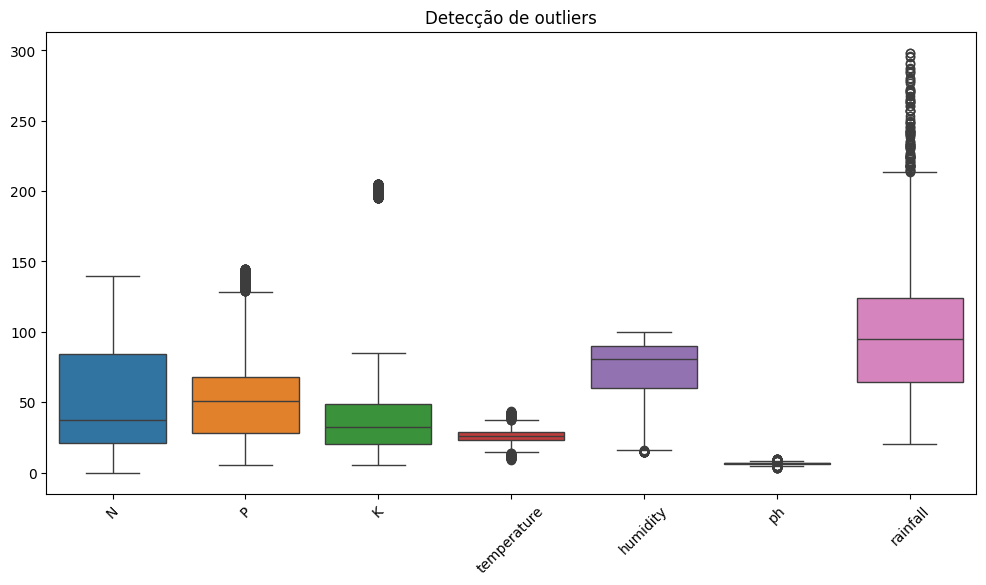

In [81]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

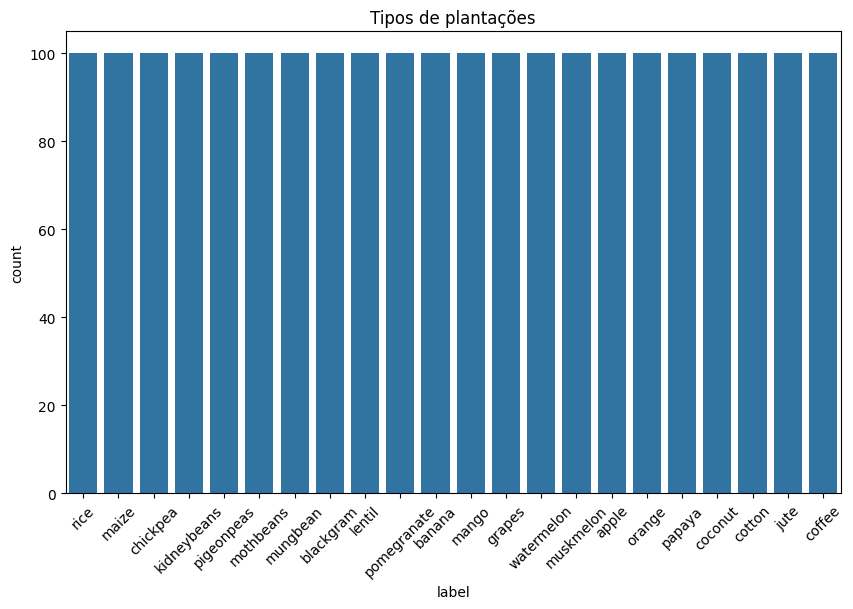

In [82]:
# Apresentação da distribuição dos labels

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title("Tipos de plantações")
plt.xticks(rotation=45)
plt.show()

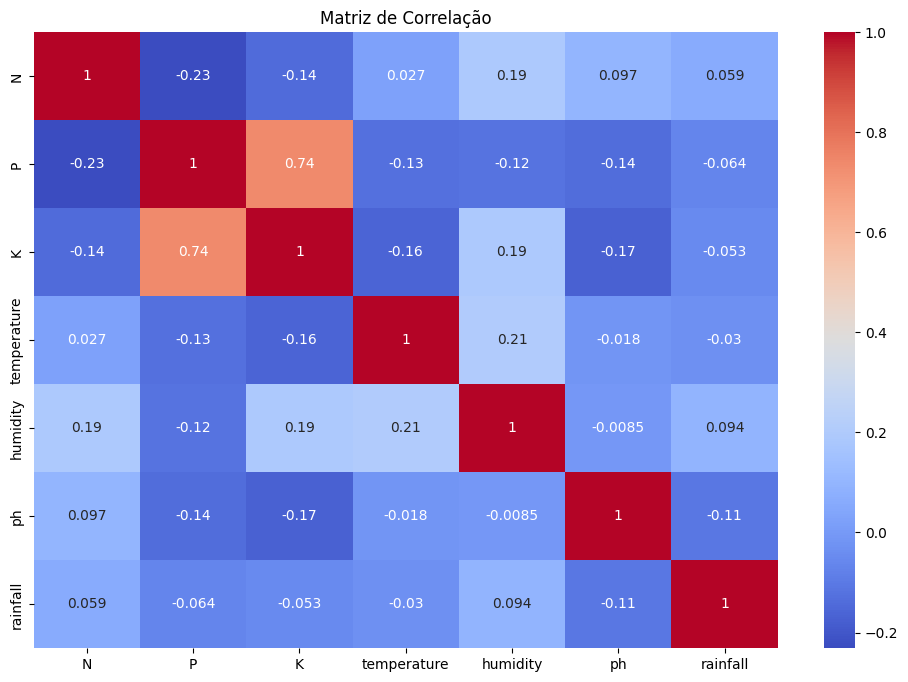

In [83]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# LIMPEZA DE DADOS

In [107]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ['N','P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = df[coluna].median()
            df[coluna] = df[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
df.shape

Coluna 'N' possuia 0 outliers.
Coluna 'P' possuia 0 outliers.
Coluna 'K' possuia 0 outliers.
Coluna 'temperature' possuia 0 outliers.
Coluna 'humidity' possuia 0 outliers.
Coluna 'ph' possuia 0 outliers.
Coluna 'rainfall' possuia 0 outliers.


(2200, 8)

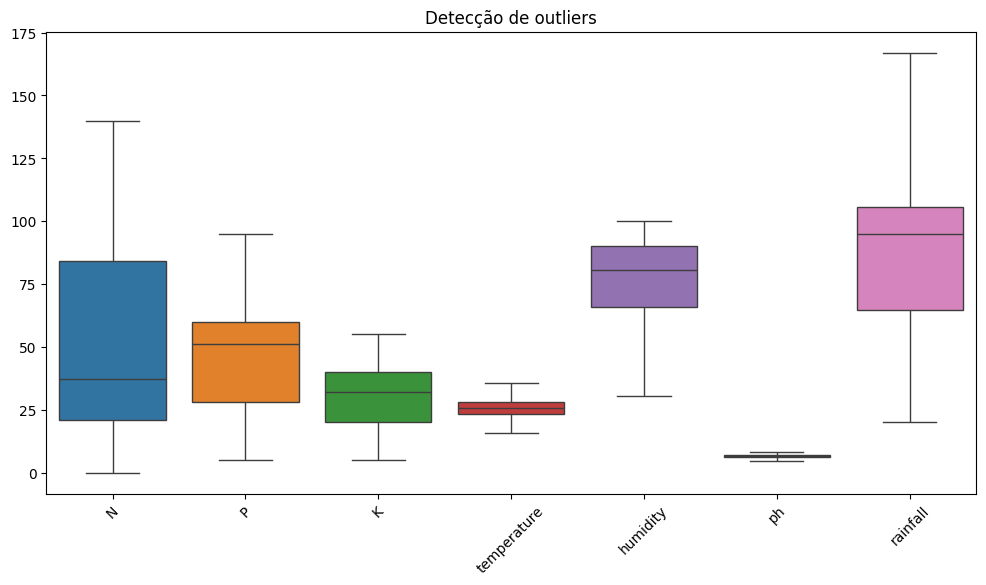

In [108]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

In [109]:
# Separando features e labels
X = df.drop('label', axis=1)
y = df['label']

# Label Encoder para a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)

# DADOS PARA TREINAMENTO E APROVAÇÃO

In [110]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das features numéricas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_teste_scaled = scaler.transform(X_test)

# CONSTRUÇÃO DOS MODELO PREDITIVOS

In [111]:
# Gera dicionário para armazenar as acurácias de cada modelo e posteriormente rankear
modelos = {}

In [112]:
# Regressão Logística

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_teste_scaled)

# Resultados
ScoreRL = accuracy_score(y_test, y_pred_logreg)
print("Acurácia Regressão Logística:", ScoreRL)
print(classification_report(y_test, y_pred_logreg))

# Armazena valor
modelos ['Regressão Logística'] = ScoreRL

Acurácia Regressão Logística: 0.9409090909090909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       0.96      0.96      0.96        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       0.93      0.93      0.93        14
           8       0.70      0.70      0.70        23
           9       0.90      0.95      0.93        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        17
          16       1.00      1.0

In [113]:
# KNN - 10 vizinhos

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_teste_scaled)

# Resultados
ScoreKNN = accuracy_score(y_test, y_pred_knn)
print("Acurácia KNN:", ScoreKNN)
print(classification_report(y_test, y_pred_knn))

# Armazena valor
modelos ['KNN'] = ScoreKNN

Acurácia KNN: 0.9545454545454546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       0.93      1.00      0.97        14
           8       0.75      0.78      0.77        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       1.00      0.90      0.95        21
          12       1.00      1.00      1.00        19
          13       0.95      0.88      0.91        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00     

In [114]:
# SVM com kernel RBF -> mais complexo
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_teste_scaled)

# Resultados
ScoreSVM_RBF = accuracy_score(y_test, y_pred_svm_rbf)
print("Acurácia SVM (RBF):", ScoreSVM_RBF)
print(classification_report(y_test, y_pred_svm_rbf))

# Armazena valor
modelos ['SVM (RBF)'] = ScoreSVM_RBF

Acurácia SVM (RBF): 0.9636363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.75      0.65      0.70        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.0

In [115]:
# SVM com kernel polinomial -> intermediário
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly = svm_poly.predict(X_teste_scaled)

# Resultados
ScoreSVM_P = accuracy_score(y_test, y_pred_svm_poly)
print("Acurácia SVM (Polinomial):", ScoreSVM_P )
print(classification_report(y_test, y_pred_svm_poly))

# Armazena valor
modelos ['SVM (Polinomial)'] = ScoreSVM_P

Acurácia SVM (Polinomial): 0.9727272727272728
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.75      0.78      0.77        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00  

In [116]:
# SVM com kernel linear -> o mais simples
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_teste_scaled)

# Resultados
ScoreSVM_L = accuracy_score(y_test, y_pred_svm_linear)
print("Acurácia SVM (Linear):", ScoreSVM_L)
print(classification_report(y_test, y_pred_svm_linear))

# Armazena valor
modelos ['SVM (Linear)'] = ScoreSVM_L

Acurácia SVM (Linear): 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       1.00      0.26      0.41        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       1.00      0.90      0.95        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14

In [117]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_teste_scaled)

# Resultados
ScoreDT = accuracy_score(y_test, y_pred_dt)
print("Acurácia Decision Tree:", ScoreDT)
print(classification_report(y_test, y_pred_dt))

# Armazena valor
modelos ['Decision Tree'] = ScoreDT

Acurácia Decision Tree: 0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.85      1.00      0.92        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

In [118]:
# Random Forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_teste_scaled)

# Resultados
ScoreRFO = accuracy_score(y_test, y_pred_rf)
print("Acurácia Random Forest:", ScoreRFO)
print(classification_report(y_test, y_pred_rf))

# Armazena valor
modelos ['Random Forest'] = ScoreRFO

Acurácia Random Forest: 0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

In [121]:
# CONCLUSÃO

# Gerar o ranking das acurácias
ranking = sorted(modelos.items(), key=lambda x: x[1], reverse=True)

# Exibir o ranking
print("Ranking dos Mellhores Modelos:\n")
for i, (model, accuracy) in enumerate(ranking, 1):
    print(f"{i}. {model}: {accuracy:.4f}")


Ranking dos Mellhores Modelos:

1. Random Forest: 0.9932
2. Decision Tree: 0.9864
3. SVM (Polinomial): 0.9727
4. SVM (RBF): 0.9636
5. KNN: 0.9545
6. SVM (Linear): 0.9500
7. Regressão Logística: 0.9409
